In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [6]:
iris = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

In [7]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
iris['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [9]:
X = iris.drop('variety',axis=1)
Y = iris['variety']

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

In [11]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [12]:
print(confusion_matrix(Y_test,Y_pred))

[[14  0  0]
 [ 0 17  0]
 [ 0  1 13]]


In [13]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.94      1.00      0.97        17
   Virginica       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [14]:
print(accuracy_score(Y_test,Y_pred))

0.9777777777777777


In [15]:
from sklearn.tree import export_text

In [23]:
X_train.columns.values

array(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'],
      dtype=object)

In [24]:
modeltext = export_text(model,feature_names=['sepal.length', 'sepal.width', 'petal.length', 'petal.width'],)

In [25]:
print(modeltext)

|--- petal.width <= 0.75
|   |--- class: Setosa
|--- petal.width >  0.75
|   |--- petal.width <= 1.75
|   |   |--- petal.length <= 4.95
|   |   |   |--- petal.width <= 1.60
|   |   |   |   |--- class: Versicolor
|   |   |   |--- petal.width >  1.60
|   |   |   |   |--- class: Virginica
|   |   |--- petal.length >  4.95
|   |   |   |--- petal.width <= 1.55
|   |   |   |   |--- class: Virginica
|   |   |   |--- petal.width >  1.55
|   |   |   |   |--- class: Versicolor
|   |--- petal.width >  1.75
|   |   |--- petal.length <= 4.85
|   |   |   |--- sepal.width <= 3.10
|   |   |   |   |--- class: Virginica
|   |   |   |--- sepal.width >  3.10
|   |   |   |   |--- class: Versicolor
|   |   |--- petal.length >  4.85
|   |   |   |--- class: Virginica



In [19]:
help(export_text)

Help on function export_text in module sklearn.tree._export:

export_text(decision_tree, *, feature_names=None, max_depth=10, spacing=3, decimals=2, show_weights=False)
    Build a text report showing the rules of a decision tree.
    
    Note that backwards compatibility may not be supported.
    
    Parameters
    ----------
    decision_tree : object
        The decision tree estimator to be exported.
        It can be an instance of
        DecisionTreeClassifier or DecisionTreeRegressor.
    
    feature_names : list of str, default=None
        A list of length n_features containing the feature names.
        If None generic names will be used ("feature_0", "feature_1", ...).
    
    max_depth : int, default=10
        Only the first max_depth levels of the tree are exported.
        Truncated branches will be marked with "...".
    
    spacing : int, default=3
        Number of spaces between edges. The higher it is, the wider the result.
    
    decimals : int, default=2
 

In [26]:
X_train

,sepal.length,sepal.width,petal.length,petal.width
32,5.2,4.1,1.5,0.1
52,6.9,3.1,4.9,1.5
70,5.9,3.2,4.8,1.8
121,5.6,2.8,4.9,2.0
144,6.7,3.3,5.7,2.5
...,...,...,...,...
113,5.7,2.5,5.0,2.0
64,5.6,2.9,3.6,1.3
15,5.7,4.4,1.5,0.4
125,7.2,3.2,6.0,1.8


In [27]:
X_test

,sepal.length,sepal.width,petal.length,petal.width
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2
60,5.0,2.0,3.5,1.0
72,6.3,2.5,4.9,1.5
67,5.8,2.7,4.1,1.0
39,5.1,3.4,1.5,0.2
55,5.7,2.8,4.5,1.3


In [28]:
test_data = X_test[1:3]

In [29]:
test_data

,sepal.length,sepal.width,petal.length,petal.width
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2


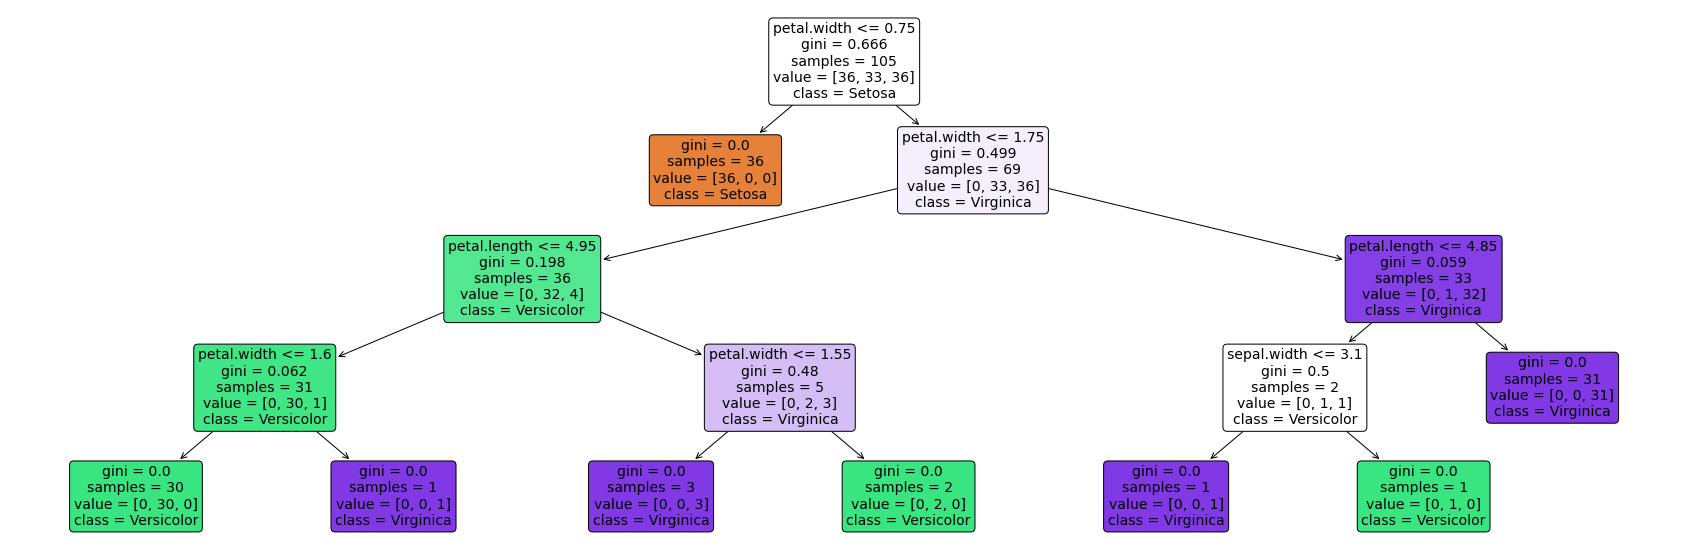

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
a = plot_tree(model,
                   feature_names = X.columns,
                   class_names = Y.unique(),
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

In [34]:
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")

In [35]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
Y = wine['quality']
X = wine.drop('quality',axis=1) 

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

In [39]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [40]:
print(accuracy_score(Y_test,Y_pred))

0.6041666666666666


In [41]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [46]:
print(export_text(model,feature_names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']))

|--- alcohol <= 9.85
|   |--- total sulfur dioxide <= 98.50
|   |   |--- sulphates <= 0.57
|   |   |   |--- total sulfur dioxide <= 88.50
|   |   |   |   |--- alcohol <= 9.08
|   |   |   |   |   |--- pH <= 3.34
|   |   |   |   |   |   |--- citric acid <= 0.55
|   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |--- citric acid >  0.55
|   |   |   |   |   |   |   |--- total sulfur dioxide <= 43.50
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- total sulfur dioxide >  43.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- pH >  3.34
|   |   |   |   |   |   |--- pH <= 3.44
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- pH >  3.44
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |--- alcohol >  9.08
|   |   |   |   |   |--- chlorides <= 0.08
|   |   |   |   |   |   |--- volatile acidity <= 0.42
|   |   |   |   |   |   |   |--- chlorides <= 0.07
|   |   |   |   |   |   |   |   |--- sulphates

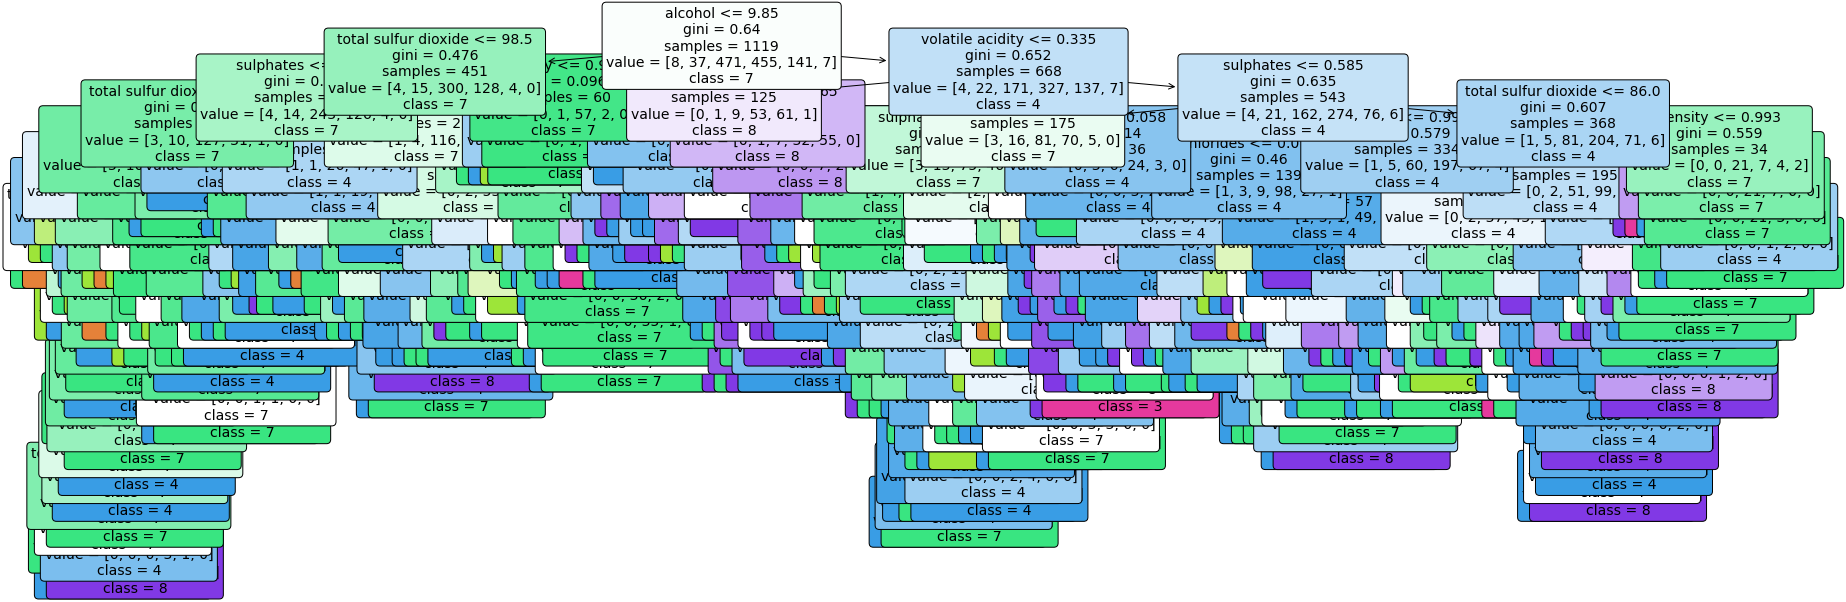

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
a = plot_tree(model,
                  feature_names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
              class_names=['5', '6', '7', '4', '8', '3'],
              
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

In [51]:
Y.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [48]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object